### Task: Build Simulation Orchestrator
* Create a rebase and non-rebasing token and simulate a series of N deposits
* https://docs.python.org/3/c-api/reflection.html

In [1]:
import os
import copy
import numpy as np
import time
import matplotlib.pyplot as plt
cwd =  os.getcwd().replace("notebooks/test","")
os.chdir(cwd)

from python.dev.simulation import SimulationOrchestrator
from python.dev.simulation import EventQueue
from python.dev.simulation import EventExecutor

from python.dev.agent import TokenAgent
from python.dev.agent import UserAgent

from python.dev.action import MintAction
from python.dev.event import Mint

from python.dev.simulation.batch import WithdrawBatch
from python.dev.simulation.batch import DepositBatch

In [2]:
apy = 0.123456
target1 = TokenAgent('T1_DEPOSIT')
target2 = TokenAgent('TCT_DEPOSIT')
user = UserAgent('sim_user')

In [3]:
mint_event1 = Mint(10000, 0.1234567, target1, True)
mint_event2 = Mint(10000, 0.1234567, target1, True)
mint_event3 = Mint(10000, 0.1234567, target2, False)

In [4]:
n_events = 100

dBatch1 = DepositBatch(target1, user, mint_event1.get_id())
dBatch2 = DepositBatch(target2, user, mint_event3.get_id())

deposit_batch1 = dBatch1.simulate_events(apy, n_events)
deposit_batch2 = dBatch2.simulate_events(apy, n_events)

In [5]:
q = EventQueue(alternate_batches = True)
q.add_event(MintAction(mint_event1, target1, user))
q.add_event(MintAction(mint_event2, target1, user))
q.add_event(MintAction(mint_event3, target2, user))
q.add_event_batch(deposit_batch1)
q.add_event_batch(deposit_batch2)

In [6]:
orchestrator = SimulationOrchestrator()
executor = EventExecutor(q, orchestrator)
executor.run()

False

In [7]:
T1 = target1.get_token()
TCT1 = target2.get_token()

t1Address = target1.get_address(mint_event1.get_id())
tctAddress = target2.get_address(mint_event3.get_id())

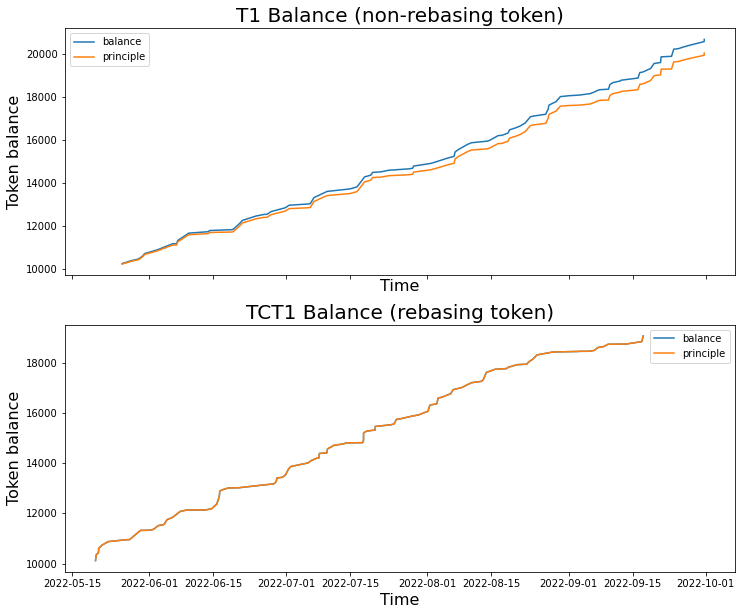

In [8]:
# Analyze Token balances

T1_states = T1.get_state_series(t1Address)
principle = T1_states.get_principle() 
balance = T1_states.get_balance() 
tSamp = T1_states.get_tstamp()  

fig, (T1_ax, TCT1_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(12, 10))

T1_ax.plot(tSamp[1:], balance[1:], label='balance') 
T1_ax.plot(tSamp[1:], principle[1:], label='principle') 
T1_ax.set_title("T1 Balance (non-rebasing token)", fontsize=20)
T1_ax.set_ylabel("Token balance", fontsize=16)
T1_ax.set_xlabel('Time', fontsize=16)
T1_ax.legend()

TCT1_states = TCT1.get_state_series(tctAddress)
principle = TCT1_states.get_principle() 
balance = TCT1_states.get_balance() 
tSamp = TCT1_states.get_tstamp() 

TCT1_ax.plot(tSamp[1:], balance[1:], label='balance') 
TCT1_ax.plot(tSamp[1:], principle[1:], label='principle') 
TCT1_ax.set_title("TCT1 Balance (rebasing token)", fontsize=20)
TCT1_ax.set_ylabel("Token balance", fontsize=16)
TCT1_ax.set_xlabel('Time', fontsize=16)
TCT1_ax.legend()
